In [67]:
# import module and package

# data manipulation
import pandas as pd
import numpy as np

# vizualisation
import seaborn as sns
import matplotlib.pyplot as plt

# prepocessing
from sklearn.preprocessing import OneHotEncoder

In [3]:
# load the dataset
df = pd.read_csv('data/bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.duplicated().sum() # duplicate rows check

0

In [5]:
df.info() # check on variable type and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
# let's take a look at features (categorical or numeric)
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [45]:
# Let's drop phone number this is a irrelevant feature
df.drop(['phone number'],axis=1,inplace=True)
df.shape

(3333, 20)

In [49]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [46]:
num_cols = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
            'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
            'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']

cat_cols = ['state','area code','international plan','voice mail plan']

In [47]:
# split categoricals and numerics columns
#cat_cols = [col for col in df.columns if df[col].dtype == 'object' or df[col].nunique() < 10]
#num_cols = [col for col in df.columns if df[col].dtype != 'object' or df[col].nunique() >= 10]

The target feature is `churn` and we can see that churn has 2 distinct values (False and True). So we can say that we are goingto work on a classification problem. 

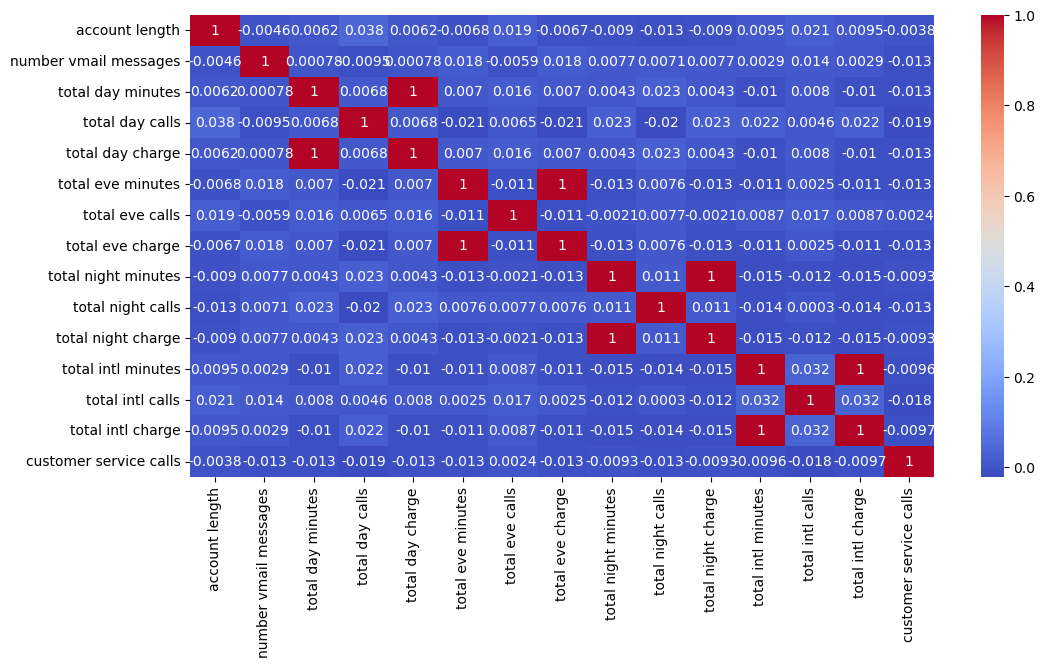

In [56]:
plt.figure(figsize=(12,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.show()

In [57]:
df= df.drop(columns=[
    "total day charge",
    "total eve charge",
    "total night charge",
    "total intl charge"
])

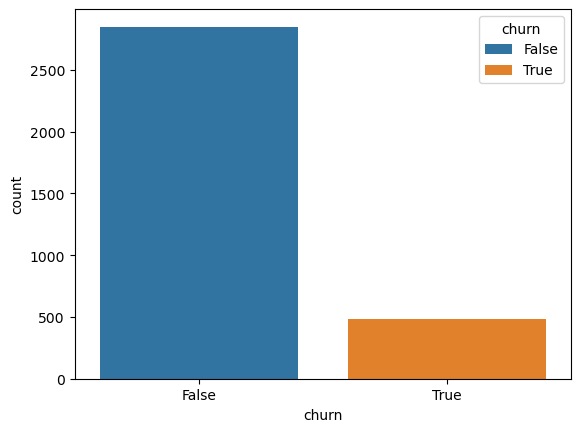

In [65]:
sns.countplot(x='churn', hue='churn', data=df)
plt.show()

In [63]:
print(df["churn"].value_counts(normalize=True))

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64


In [70]:
# encoding categorical features to numeric

df_encoded = pd.get_dummies(df, columns=['state'], drop_first=True)

In [73]:
df_encoded.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,no,yes,25,265.1,110,197.4,99,244.7,...,False,False,False,False,False,False,False,False,False,False
1,107,415,no,yes,26,161.6,123,195.5,103,254.4,...,False,False,False,False,False,False,False,False,False,False
2,137,415,no,no,0,243.4,114,121.2,110,162.6,...,False,False,False,False,False,False,False,False,False,False
3,84,408,yes,no,0,299.4,71,61.9,88,196.9,...,False,False,False,False,False,False,False,False,False,False
4,75,415,yes,no,0,166.7,113,148.3,122,186.9,...,False,False,False,False,False,False,False,False,False,False
